IMPORTING LIBRARIES:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

LOADING DATASET:

In [2]:
ds=pd.read_csv(r"Iris.csv")

In [3]:
ds

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df=pd.DataFrame(ds)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2

[150 rows x 6 columns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


VISUALISING THE DATA:

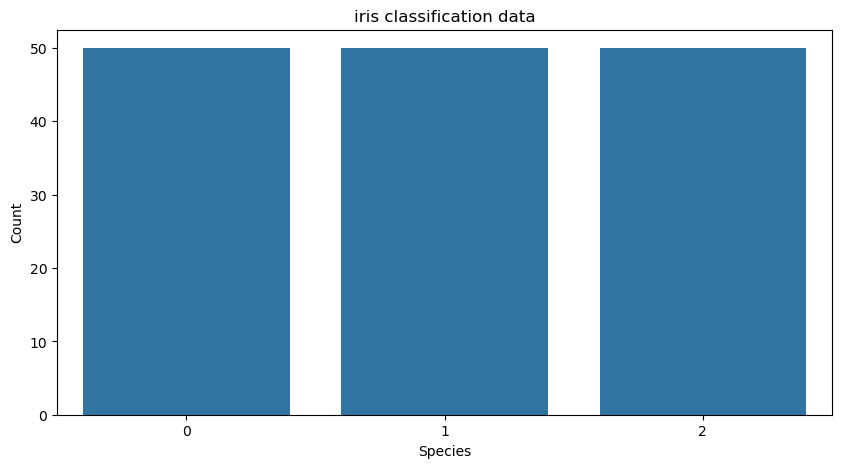

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Species', data=df)
plt.title('iris classification data')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

SPILTTING DATA SET INTO TRAIN AND TEST SETS:

In [8]:
x=df.iloc[:,:5]
y=df.iloc[:,5]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

TRAINING THE LOGISTIC REGRESSION MODEL:

In [10]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(x_train, y_train)

/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred=lr.predict(x_test)

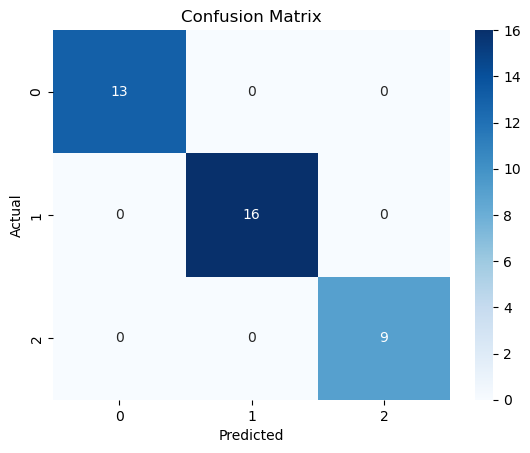

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
a=accuracy_score(y_test,y_pred)
print("The accuracy score is:",a)

The accuracy score is: 1.0


In [14]:
Iris_setosa= df[df['Species'] == 0]
Iris_versicolor = df[df['Species'] == 1]
Iris_virginica= df[df['Species'] == 2]
print('number of Iris_setosa species: {}'.format(len(df[df['Species'] == 0])))
print('number of Iris_versicolor species: {}'.format(len(df[df['Species'] == 1])))
print('number of Iris_virginica species: {}'.format(len(df[df['Species'] == 2])))

number of Iris_setosa species: 50
number of Iris_versicolor species: 50
number of Iris_virginica species: 50
